In [5]:
# part 1 and 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep = "\s+", 
                   names =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','car name'], 
                   header= None)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
# part 3 
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
# part 4
convert = df
convert['horsepower'] = pd.to_numeric(convert['horsepower'], errors ='coerce')
convert.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
convert.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [13]:
# checking null values
convert.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
#searching null data in horsepower column
convert[(convert['horsepower'].isnull())]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [15]:
#Replacing Null values with 0
convert = convert.fillna(0.0)

In [16]:
#Checking if there are still null values
convert.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
convert.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
#Converting origin from int64 to object
convert['origin'] = convert['origin'].astype(str)
convert.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [19]:
convert.head (5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [20]:
# Part 5 Changing origin to countries. 1=USA 2=Asia 3=Europe
convert.loc[convert['origin']=='1', 'origin'] = 'USA'
convert.loc[convert['origin']=='2', 'origin'] = 'Asia'
convert.loc[convert['origin']=='3', 'origin'] = 'Europe'
convert.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


<Axes: xlabel='cylinders'>

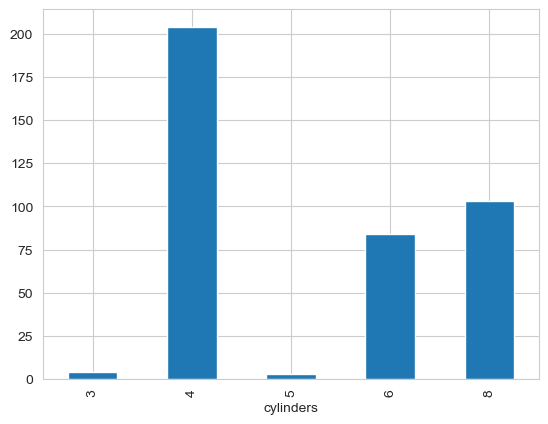

In [23]:
# 6 Barchart showing distribution by cylindres
convert.to_csv('autompg.csv', index = False)
data = pd.read_csv('autompg.csv')
data.isnull().sum()
data.head(5)
sns.set_style('whitegrid')
CYL = data.groupby('cylinders')
CYL['car name'].count().plot.bar()
# data['cylinders'].plot.bar().groupby(data['cylinders']

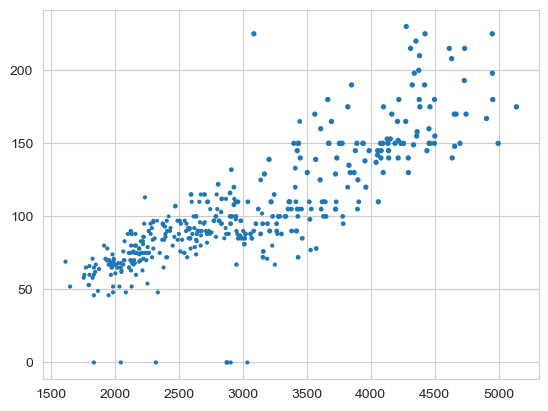

In [25]:
# Part 7 Scatterplot
plt.scatter(data.weight, data.horsepower, s=data.cylinders)


<Axes: xlabel='origin', ylabel='model year'>

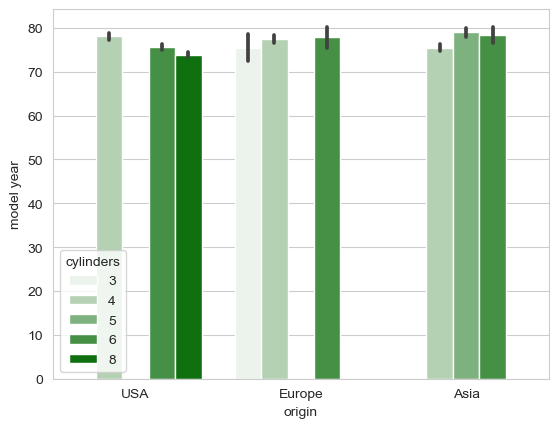

In [26]:
#Barchart showing distribution by cylindres
sns.set_style('whitegrid')
sns.barplot(x = 'origin', y = 'model year', hue = 'cylinders', color= 'green', data = data)